# 📍 Feature Engineering to improve the Accuracy of the Model
- Feature engineering is very important in ML and DL.
  - By Performing feature engineering create new feature from existing feature,
    - Which then improve the classification problem of the model.

# ANN Human action recognition
- Goal:
  - Create a Neural network that can recognizes, in order word classify different action perform by humans.
  
  ![alt text](Images/image-4.png)
  - Here we have an example of 27 different action performed by humans.
- The dataset is in the form of images.
  - the dataset for human action recognition are of two different types.
    -  The data can be collected in the form of images as show on the image above
    -  The data can be collected with help of a sensor
 - The data set that we're going to use is a **heterogeneous dataset**.
   - This dataset consist of 6 different actions.
     - 0: WALKING
     - 1: Bike
     - 2: RUNNING
     - 3: WALKING DOWNSTAIRS
     - 4: WALKING UPSTAIRS
     - 5: SITTING
     - 6: STANDING
- And we have to design this dataset that can classify this 6 classes using sensor data.



# 0. Importing Libraries

In [213]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import style
style.use('default')

import torch
import torch.nn as nn
import torch.nn.functional as F      # <- Use to create our activation functions.
from torch.utils.data import DataLoader, TensorDataset

# from sklearn.model_selection import train_test_split

### &nbsp;&nbsp;&nbsp;&nbsp; Checking if cuda is available

In [214]:
torch.cuda.is_available()

False

### &nbsp;&nbsp;&nbsp;&nbsp; Selecting the GPU as device for training and testing

In [215]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [216]:
#from google.colab import drive
#drive.mount('/content/drive')

In [217]:
# %cd path??

# 1. Importing and processing the Data

### &nbsp;&nbsp;&nbsp;&nbsp; 1.1 Importing the Dataset

In [218]:
dataset = pd.read_csv('Heterogeneous_accelerometer_HAR.csv')

dataset.shape

(3540962, 10)

### &nbsp;&nbsp;&nbsp;&nbsp; 1.2 Data Processing

In [219]:
dataset.head()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696638740,27920678471000,-0.565032,-9.572019,-0.614113,a,gear,gear_1,stand
1,1,1424696638740,27920681910000,-0.832584,-9.713276,-0.606930,a,gear,gear_1,stand
2,2,1424696638740,27920692014000,-1.018134,-9.935339,-0.544082,a,gear,gear_1,stand
3,3,1424696638741,27920701983000,-1.222838,-10.142437,-0.566229,a,gear,gear_1,stand
4,4,1424696638741,27920711906000,-1.577180,-10.480618,-0.402824,a,gear,gear_1,stand


- Some Information are irrelevant such: index, arrival time, creation time, model of device, and device are all irrelevant.
- X, Y and Z are important, since they are collected with the accelometer

In [220]:
type(dataset)

pandas.core.frame.DataFrame

In [221]:
# Check if the is any null value present
dataset.isnull().any()

,0
Index,False
Arrival_Time,False
Creation_Time,False
x,False
y,False
z,False
User,False
Model,False
Device,False
gt,True


- We can see that we have null where its "True", since we have many samples we can easily drop those rows.

In [222]:
# Dropping the nan values
dataset.dropna(inplace = True)

In [223]:
# Checking the null values again
dataset.isnull().any()

,0
Index,False
Arrival_Time,False
Creation_Time,False
x,False
y,False
z,False
User,False
Model,False
Device,False
gt,False


- We don't not have null values anylonger.

In [224]:
# Extracting the important data i.e. X, Y, Z, gt and dropping the rest
har = dataset[['x','y','z','gt']]          # <= har: Human Action Recognition
                                           # <= gt: is the label

In [225]:
# Checking the head of the data, if data were succefully extracted
har.head()

,x,y,z,gt
0,-0.565032,-9.572019,-0.614113,stand
1,-0.832584,-9.713276,-0.606930,stand
2,-1.018134,-9.935339,-0.544082,stand
3,-1.222838,-10.142437,-0.566229,stand
4,-1.577180,-10.480618,-0.402824,stand


In [226]:
# Let's see uniques labels present in gt
har['gt'].unique()

array(['stand', 'sit', 'walk', 'stairsup', 'stairsdown', 'bike'],
      dtype=object)

In [227]:
# number of labels
number_class = len(har['gt'].unique())

number_class

6

In [228]:
# Storng all the stand labels in the variable stand
stand = har[har['gt'] == 'stand']

In [229]:
stand.head()

,x,y,z,gt
0,-0.565032,-9.572019,-0.614113,stand
1,-0.832584,-9.713276,-0.606930,stand
2,-1.018134,-9.935339,-0.544082,stand
3,-1.222838,-10.142437,-0.566229,stand
4,-1.577180,-10.480618,-0.402824,stand


In [230]:
stand.shape

(451189, 4)

In [231]:
# Selecting 5000 samples belonging to the stand class
stand = stand.iloc[0:5000, :]

In [232]:
stand.shape

(5000, 4)

- Now stand only contains 5000 *samples*

In [233]:
type(stand)

pandas.core.frame.DataFrame

In [234]:
# storing all the sit labels in the variable sit
sit = har[har['gt'] == 'sit']

In [235]:
# Diplaying the 1st 5 samples
sit.head()

,x,y,z,gt
5405,-10.530297,-2.439093,-3.663727,sit
5406,-9.252991,-3.397971,-1.118092,sit
5407,-9.252991,-3.397971,-1.118092,sit
5408,-9.252991,-3.397971,-1.118092,sit
5409,-9.248801,-3.409942,-1.101931,sit


In [236]:
sit.shape

(423995, 4)

In [237]:
# selecting only 5000 samples and storing it in sit
sit = sit.iloc[0:5000, :]

In [238]:
sit.shape

(5000, 4)

In [239]:
# assigning 5000 walk sample to the variable walk
walk = har[har['gt'] == 'walk'].iloc[0:5000, :]

In [240]:
walk.shape

(5000, 4)

In [241]:
# assigning 5000 stairup sample to the variable stairsup
stairsup = har[har['gt'] == 'stairup'].iloc[0:5000, :]

In [242]:
stairsup.shape

(0, 4)

In [243]:
# assigning 5000 stairsdown sample to the variable stairsdown
stairsdown = har[har['gt'] == 'stairdown'].iloc[0:5000, :]

In [244]:
stairsdown.shape

(0, 4)

In [245]:
# assigning 5000 bike sample to the variable bike
bike = har[har['gt'] == 'bike'].iloc[0:5000, :]

In [246]:
bike.shape

(5000, 4)

In [247]:
# Concatinating all the variables together
har_new_concat = pd.concat([stand, sit, walk, stairsup, stairsdown, bike])

In [248]:
har_new_concat.shape

(20000, 4)

In [249]:
har_new_concat

,x,y,z,gt
0,-0.565032,-9.572019,-0.614113,stand
1,-0.832584,-9.713276,-0.606930,stand
2,-1.018134,-9.935339,-0.544082,stand
3,-1.222838,-10.142437,-0.566229,stand
4,-1.577180,-10.480618,-0.402824,stand
...,...,...,...,...
32228,-7.964911,-0.887650,6.034586,bike
32229,-8.882488,-1.451485,6.030994,bike
32230,-8.641871,-1.823783,6.533178,bike
32231,-9.081207,-1.670554,7.043143,bike


### &nbsp;&nbsp;&nbsp;&nbsp; 1.3 Transforming the categorical variables to numerics

In [250]:
har_new_concat['gt'] = har_new_concat['gt'].replace(to_replace='stand', value=0)
har_new_concat['gt'] = har_new_concat['gt'].replace(to_replace='sit', value=1)
har_new_concat['gt'] = har_new_concat['gt'].replace(to_replace='walk', value=2)
har_new_concat['gt'] = har_new_concat['gt'].replace(to_replace='stairup', value=3)
har_new_concat['gt'] = har_new_concat['gt'].replace(to_replace='stairdown', value=4)
har_new_concat['gt'] = har_new_concat['gt'].replace(to_replace='bike', value=5)

/tmp/ipython-input-1529349107.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  har_new_concat['gt'] = har_new_concat['gt'].replace(to_replace='bike', value=5)


In [251]:
har_new_concat

,x,y,z,gt
0,-0.565032,-9.572019,-0.614113,0
1,-0.832584,-9.713276,-0.606930,0
2,-1.018134,-9.935339,-0.544082,0
3,-1.222838,-10.142437,-0.566229,0
4,-1.577180,-10.480618,-0.402824,0
...,...,...,...,...
32228,-7.964911,-0.887650,6.034586,5
32229,-8.882488,-1.451485,6.030994,5
32230,-8.641871,-1.823783,6.533178,5
32231,-9.081207,-1.670554,7.043143,5


- Categorical variables has been replace with intergers

# 🎁 2. Feature Engineering 🎁
- Since we've three featureas x, y, and z, therefore we will extract 4 new features from x, y and y. i.e. We'll create 12 new features from the existing features.
  - The samples in the new feature will be less than in the original.
    - We've 20000 feature in the original x, y and z features.
    - With the window size of 256, our new features will have (20000 - 256) samples.
  - After creating the new features, we will only use the new features in our dataset and the old features will be deleted

### &nbsp;&nbsp;&nbsp;&nbsp; 2.1 Creating new Features

In [252]:
# Step 1: create 12 empty list

# Creating empty lists to store the new features of x
X_Min = []
X_Max = []
X_Mean = []
X_Std = []

# Creating empty lists to store the new features of y
Y_Min = []
Y_Max = []
Y_Mean = []
Y_Std = []

# Creating empty lists to store the new features of z
Z_Min = []
Z_Max = []
Z_Mean = []
Z_Std = []

# Creating an empty lists for the labels
labels = []

# Defining the window size
win = 256

# Step 2: Extracting the value of x, y, z and gt from the dataset
X = har_new_concat['x'].values
Y = har_new_concat['y'].values
Z = har_new_concat['z'].values

gt = har_new_concat['gt'].values

#

# Step 2: Calculate their values using for loop.
  # Running the for loop for 20000 - window size.
for i in range(len(X) - win):

  # Extracting 256 samples every time the loop runs
  X_i = X[i : i + win]
  Y_i = Y[i : i + win]
  Z_i = Z[i : i + win]

  y = gt[i + win]
  labels.append(y)


  # From the Extracted 256 sample above, we will calculcate the min., max., mean., and st., of X and then apppend it to the empty list
  X_Min.append(np.min(X_i))
  X_Max.append(np.max(X_i))
  X_Mean.append(np.mean(X_i))
  X_Std.append(np.std(X_i))

  # From the extracted 256 samples above we will also calculate the min., max., mean., and st. of Y then apppend it to the empty list
  Y_Min.append(np.min(Y_i))
  Y_Max.append(np.max(Y_i))
  Y_Mean.append(np.mean(Y_i))
  Y_Std.append(np.std(Y_i))

  # From the extracted 256 samples above we will also calculate the min., max., mean., and st. of Z then apppend it to the empty list
  Z_Min.append(np.min(Z_i))
  Z_Max.append(np.max(Z_i))
  Z_Mean.append(np.mean(Z_i))
  Z_Std.append(np.std(Z_i))

# So new features have been created

### &nbsp;&nbsp;&nbsp;&nbsp; 2.2 Creating a new Datafram consisting of only the new feature.

In [253]:
New_Dataframe  = pd.DataFrame({
    'X_Min': X_Min, 'X_Max': X_Max, 'X_Mean': X_Mean, 'X_Std': X_Std,
    'Y_Min': Y_Min, 'Y_Max': Y_Max, 'Y_Mean': Y_Mean, 'Y_Std': Y_Std,
    'Z_Min': Z_Min, 'Z_Max': Z_Max, 'Z_Mean': Z_Mean, 'Z_Std': Z_Std,
    'labels': labels
})

In [254]:
New_Dataframe

,X_Min,X_Max,X_Mean,X_Std,Y_Min,Y_Max,Y_Mean,Y_Std,Z_Min,Z_Max,Z_Mean,Z_Std,labels
0,-12.600683,-0.565032,-8.930767,1.345873,-11.082760,-3.336919,-3.954286,1.272895,-1.379060,1.015740,-1.006481,0.298180,0
1,-12.600683,-0.832584,-8.963975,1.239743,-11.082760,-3.336919,-3.932986,1.223371,-1.379060,1.015740,-1.008789,0.297420,0
2,-12.600683,-1.018134,-8.996428,1.130377,-11.082760,-3.336919,-3.910559,1.168600,-1.379060,1.015740,-1.011457,0.296866,0
3,-12.600683,-1.222838,-9.028315,1.014014,-11.082760,-3.336919,-3.886816,1.106022,-1.379060,1.015740,-1.014370,0.295923,0
4,-12.600683,-1.577180,-9.059589,0.888489,-11.082760,-3.336919,-3.861887,1.034341,-1.379060,1.015740,-1.017286,0.295169,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19739,-11.146805,-4.592678,-7.576585,1.146897,-3.280655,1.973421,-0.822640,0.926178,3.188478,8.395866,5.920372,0.951775,5
19740,-11.146805,-4.592678,-7.576867,1.146983,-3.280655,1.973421,-0.824971,0.925588,3.188478,8.395866,5.916360,0.949116,5
19741,-11.146805,-4.592678,-7.584871,1.148916,-3.280655,1.973421,-0.828515,0.926243,3.188478,8.395866,5.912890,0.947065,5
19742,-11.146805,-4.592678,-7.593325,1.148700,-3.280655,1.973421,-0.834323,0.927802,3.188478,8.395866,5.910702,0.944980,5


- If substract 256 from 20000 samples, we'll get 19744 samples.
- We#ve 13 columns and we've create 12 new features and the 13th column is our labels.

### &nbsp;&nbsp;&nbsp;&nbsp; 2.3 Extracting the Final features and labels

In [255]:
# Extracting the features
data = New_Dataframe[New_Dataframe.columns[0: -1]].values        # <= Extracting the feature and calling it data

# Extracting the label
targets = New_Dataframe[New_Dataframe.columns[-1]].values         # <= Extracting the labels and calling it target.

In [256]:
# Let's see how many target we have
data.shape

(19744, 12)

In [257]:
# Let's see how many labels we have
targets.shape

(19744,)

In [258]:
# Counting the labels for each class
New_Dataframe['labels'].value_counts()


,count
labels,
1,5000
2,5000
5,5000
0,4744


In [259]:
number_class = len(New_Dataframe['labels'].unique())

number_class

4

- Which mean we have 4 classes/labels in total

# 3. Spltting the Data into Train and Test set

In [260]:
from sklearn.model_selection import train_test_split

# Splitting the model in train and test set
X_train, X_test, Y_train, Y_test = train_test_split(data, targets, test_size = 0.2)               # <= Using data as train set and targets as test set

# 4. Converting the Data from Numpy Array into Pytorch Tensor

In [261]:
# Converting the Train data into Pytorch Tensor
tensor_train_data = torch.tensor(X_train).float()
tensor_train_label = torch.tensor(Y_train).long()

# Coverting the Test data into Pytorch Tensor
tensor_test_data = torch.tensor(X_test).float()
tensor_test_label = torch.tensor(Y_test).long()

# 5. Converting the pytorch Train and Test Tensor into Pytorch Tensor Dataset.

In [262]:
# Creating a tensor training dataset
tensor_train_dataset = TensorDataset(tensor_train_data, tensor_train_label)

# Creating a tensor testing dataset
tensor_test_dataset = TensorDataset(tensor_test_data, tensor_test_label)

# Displaying the test tensor dataset
print(tensor_test_dataset.tensors)

(tensor([[-11.1917,  -1.5556,  -4.9996,  ...,  -1.0666,  -4.0776,   1.6435],
        [-12.0829,  -3.0873,  -7.2080,  ...,  10.3178,   6.3862,   1.1345],
        [ -7.6722,  -7.2927,  -7.4683,  ...,   2.6151,   2.3743,   0.0688],
        ...,
        [ -9.4230,  -9.1895,  -9.3031,  ...,  -0.3286,  -0.4642,   0.0677],
        [-10.4686,   1.6616,  -4.8384,  ...,   5.4474,  -3.7773,   2.5552],
        [-15.0535,  -3.3459,  -7.8367,  ...,   7.9290,   5.4724,   1.1102]]), tensor([2, 5, 1,  ..., 0, 2, 5]))


# 6. Passing the Tensor Dataset to the dataloader

In [263]:
# Initializing the batch size
batchsize = 64

# Creating the training dataloader
train_dataloader = DataLoader(tensor_train_dataset, batch_size = batchsize, shuffle = True, drop_last = True)  # <- Shuffle: randomize the other after each batch when training to avoid overfitting
                                                                                             # <- During Shuffling the Cross validation will be performed.

# Creating the testing dataloader
test_dataloader = DataLoader(tensor_test_dataset, batch_size = tensor_test_dataset.tensors[0].shape[0])           # <= tensor_test_dataset.tensors[0].shape[0], means we're passing the whole ..
                                                                                                                  # ... test size during training i.e. 3000


In [264]:
tensor_test_dataset.tensors[0].shape[0]

3949

# 7. Visualizing the batches of training and test data

In [265]:
for X, Y in train_dataloader:
  break

# Visualizing the train and test batch size
print(X.shape)
print(Y.shape)

torch.Size([64, 12])
torch.Size([64])


- We can see that we have 64 Batch size and 12 features in the train_dataloader
- and 64 batch labels in the train_dataloader

In [266]:
# if we want to see/know the total size of the testloader
X, Y = next(iter(test_dataloader))

# Total features in the teat_dataloader
print(X.shape)

# Total llabels in the test_dataloader
print(Y.shape)

torch.Size([3949, 12])
torch.Size([3949])


# 8. Creating the Neural Model

In [267]:
########################################## ➡️Sequential Form⬅️ #########################################

# In order to compare the performance of the neural Network we're going to retain every thing as it was....
# .... except for the feature which now 12 instead of 3 as befor.

# Now we'll see that if we increase the features by feature engineering method our neural network will perform better.

ANN_har = nn.Sequential(
    nn.Linear(12, 64),            # <= Now we've 12 feature
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 6)                          # <- Changed output features to 6 for 6 classes
  )

ANN_har

Sequential(
  (0): Linear(in_features=12, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=16, bias=True)
  (5): ReLU()
  (6): Linear(in_features=16, out_features=6, bias=True)
)

# 9. Training and testing the Model

### &nbsp;&nbsp;&nbsp;&nbsp; 9.1 Setting the Parameter of the model

In [268]:
# Setting the Learning rate
learning_rate = 0.001

# Setting the Loss Function
loss_function = nn.CrossEntropyLoss()                                                           # <= We use CrossEntropyLoss() since we're performing classification

# Setting the Optimizer
optimizer = torch.optim.SGD(ANN_har.parameters(), momentum = 0.9, lr = learning_rate)          # <= SGD = Stochastic Gradient Descent as optimizer
                                                                                                  # <= Momentum will increase the speed of optimization. max. is 1, here we set it to 0.9
# Placing the ANN_model on GPU
ANN_har = ANN_har.to(device)

### &nbsp;&nbsp;&nbsp;&nbsp; 9.2 Training and testing the model
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - We want our model to generalize well on the testing data i.e. to have the same accuracy as the trained data or even more.

In [269]:
# Number of times we want to pass the entire dataset in the ANN model
number_of_epochs = 150

# Creating a 1D tensor filled with zeros, in order to track/store the losses at each  epoch
losses = torch.zeros(number_of_epochs)                                       # <- initializing the losses tensor with 1000 zeros and at each epoch we'll store the loss
                                                                             # <- During the forward propagation we'll calculate the loss and store it in the losses tensor.

# Initializing accuracy
train_accuracy = []
test_accuracy  = []

# Using a for loop to pass the dataset 1000 times into the model
for epochi in range(number_of_epochs):

    # Putting the model in the training mode
    ANN_har.train()

    # putting the model in the device  📍📍Added📍📍
    ANN_har.to(device)


    # for loop for training in batches
    batch_accuracy = []
    batch_loss     = []

    # The for loop ensure that during a single run only 32 sample will be passed
    for X,Y in train_dataloader:

      # Reshaping from  4D to 2D 📍📍added📍📍              # <- to transform into 2D we have to multiple the last 3 dimension together i.e. 3 * 116 * 116 = 40368
      #X = X.reshape(32, 40368)                                # <- 32 is the batch size

      # Placing feature on device, since the model is in GPU feature should also be in GPU
      X = X.to(device)

      # Placing labels on device, since the model is in GPU feature should also be in GPU
      Y = Y.to(device)



      # Forward Propagation
      y_pred = ANN_har(X)                 # <- We pass the features x into the model and then the output of the model is our predictions y_pred.

      # We calculate/compute the loss
      loss = loss_function(y_pred, Y)                  # <- To calculate/compute the loss we pass the predictions y_pred and the true values y into the loss_function()...
                                                     # ... for that particular training epoch.



      # Backward  Propagation                          # <- Backward Propagation is the process of calculating the gradients of the loss function with respect to the model parameters.

      # Initialize the gradients to zero
      optimizer.zero_grad()                            # <- zero_grad() restart the gradients to zero at each epoch, so that the gradients/losses are not accumulated.

      # Calculating the gradients
      loss.backward()                                  # <- loss.backward() is used to calculate the gradients of the loss with respect to the parameters of the model.


      # Updating the model parameters
      optimizer.step()                                 # <- The optimizer.step() is used to update the model parameters so that the error could be minimized.

      # Append Batch loss after performing the batch training
      batch_loss.append(loss.item())

      # Putting y_pred back to cpu
      y_pred = y_pred.cpu()
      Y = Y.cpu()


      # Computing the Batch accuracy
      accuracy = 100*torch.mean((torch.argmax(y_pred, axis = 1) == Y ).float())
      # Appending the batch accuracy
      batch_accuracy.append(accuracy)

      ####### Batch concluded

    # Average training accuracy(outside the batch loop)
    train_accuracy.append(np.mean(batch_accuracy))                # <= traiNIng accuracy is the average of the batch accuracy.

    # Total Accuracy is the mean of the batch_loss
    losses[epochi] = np.mean(batch_loss)                          # <- Storing the loss at each epoch in a tensor losses. i.e. Put the computed loss into the epoch-th position of the losses tensor.
                                                                  # <- at each epoch/iteration we'll replace the respective zero with the calculated loss.


##################################################################################➡️ testing the model ⬅️##########################################################################################

    # Putting the model on the Testing Mode
    ANN_har.eval()

    # Deactivating the gradient since during back propagation we don't need the gradient
    with torch.no_grad():
      # Passing all the samples at once from the test_dataloader to the train model
      X_test_data, Y_test_label = next(iter(test_dataloader))

      # Pushing X and Y in GPU
      X_test_data = X_test_data.to(device)
      Y_test_label = Y_test_label.to(device)

      # Passing the testing data to the model
      y_test_pred = ANN_har(X_test_data)                           # <= Here we will obtain the prediction

      # Putting the prediction back to cpu
      y_test_pred = y_test_pred.cpu()
      Y_test_label = Y_test_label.cpu()

      # Appending the test accuracy
      test_accuracy.append(100 * torch.mean((torch.argmax(y_test_pred, dim = 1) == Y_test_label).float()))

    # printing the losses after every 5 epochs
    if (epochi % 10) == 0:
      print(f'epochs: {epochi}, loss: {losses[epochi]: 2.2f}')            # Corrected: Print average loss for epoch

epochs: 0, loss:  0.83
epochs: 10, loss:  0.02
epochs: 20, loss:  0.01
epochs: 30, loss:  0.01
epochs: 40, loss:  0.01
epochs: 50, loss:  0.00
epochs: 60, loss:  0.00
epochs: 70, loss:  0.00
epochs: 80, loss:  0.00
epochs: 90, loss:  0.00
epochs: 100, loss:  0.00
epochs: 110, loss:  0.00
epochs: 120, loss:  0.00
epochs: 130, loss:  0.00
epochs: 140, loss:  0.00


# 10. Visualizing the Performance

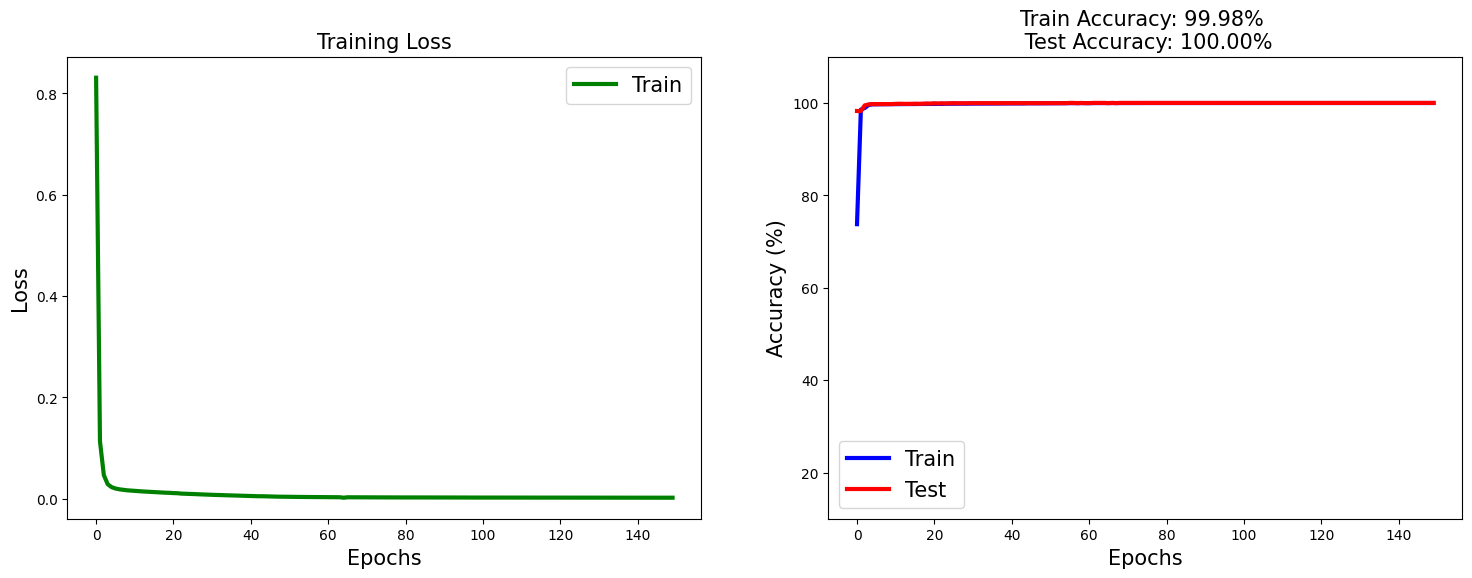

In [270]:
# Visualize the loss and accuracies after the training loop
fig, ax = plt.subplots(1, 2, figsize = (18, 6))       # <= 1 row, 2 column

ax[0].plot(losses, 'g', lw = 3, label = 'Train')      # <= ax[0] means we're plotting on the 1st column, i.e. losses on the first column, g = green
ax[0].set_xlabel('Epochs', fontsize = 15)
ax[0].set_ylabel('Loss', fontsize = 15)
ax[0].set_title('Training Loss', fontsize = 15)
ax[0].legend(fontsize = 15)

ax[1].plot(train_accuracy, 'b', lw = 3, label = 'Train')   # <= ax[1] means we're plotting on the 2nd column
ax[1].plot(test_accuracy, 'r', lw = 3, label = 'Test')
ax[1].set_xlabel('Epochs', fontsize = 15)
ax[1].set_ylabel('Accuracy (%)', fontsize = 15)
ax[1].set_ylim(10, 110)                                    # <= Setting the y limit between 10 and 110 so that we can clearly see the accuracy
ax[1].set_title(f'Train Accuracy: {train_accuracy[-1]:.2f}% \n Test Accuracy: {test_accuracy[-1]:.2f}%', fontsize = 15)       # <= Printing the final values
ax[1].legend(fontsize = 15)

plt.show()

- The loss decrease as the number of epochs increases, at the point the loss reaches zero the is no more an observable change.

# =========================== Ende of code =============================

# Saving the Trained Model

In [271]:
# Save the model with its current state(weights and biases) in the dictionary
# torch.save(model_name.state_dict(), 'name.pt')
torch.save(ANN_har.state_dict(), 'Human_Action_Recognition.pt')

# loading the Model

In [272]:
ANN_har.load_state_dict(torch.load('Human_Action_Recognition.pt'))

<All keys matched successfully>

# Test the model

In [273]:
ANN_har.to(device)

# Passing all the samples at once from the test_dataloader to the train model
X, Y = next(iter(test_dataloader))

# Pushing X and Y in GPU
X = X.to(device)
Y = Y.to(device)

# Deactivating the gradient since during back propagation we don't need the gradien
with torch.no_grad():

  # Passing the testing data to the model
  y_pred = ANN_har(X)                           # <= Here we will obtain the prediction

  # Putting the prediction back to cpu
  y_pred = y_pred.cpu()
  Y = Y.cpu()

# Appending the test accuracy
accuracy = 100 * torch.mean((torch.argmax(y_pred, dim = 1) == Y).float())
accuracy

tensor(100.)